# Player Clustering By Role
## ex) kangin and kubo are similar, although positions are different
## ex) Son and Grealish are different, despite same position

In [2]:
import json

import pandas as pd
import os, shutil

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import umap.umap_ as umap

from statsbombpy import sb



import math
import time
import random
import matplotlib
import numpy.random as nrand
from sklearn.preprocessing import normalize

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
sb.matches(2, 27) # EPL 15/16
matches = sb.matches(competition_id=2, season_id=27)
events = pd.concat([sb.events(match_id=x) for x in matches['match_id'].iloc[:]])


c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-pa

In [41]:
events.columns[:40]

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won'],
      dtype='object')

In [203]:
events['duel_outcome'].unique()

array([nan, 'Success In Play', 'Won', 'Lost Out', 'Lost In Play',
       'Success Out'], dtype=object)

In [200]:
events['pass_outcome'].unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Injury Clearance',
       'Pass Offside'], dtype=object)

In [199]:
events['dribble_outcome'].unique()

array([nan, 'Complete', 'Incomplete'], dtype=object)

In [202]:
events['shot_outcome'].unique()

array([nan, 'Blocked', 'Off T', 'Wayward', 'Post', 'Saved', 'Goal',
       'Saved Off Target', 'Saved to Post'], dtype=object)

In [42]:
events.columns[40:]

Index(['pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'period', 'play_pattern', 'player',
       'player_id', 'position', 'possession', 'possession_team',
       'possession_team_id', 'related_events', 'second', 'shot_aerial_won',
       'shot_body_part', 'shot_end_location', 'shot_first_time',
       'shot_freeze_frame', 'shot_key_pass_id', 'shot_one_on_one',
       'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
       'substitution_outcome', 'substitution_replacement', 'tactics', 'team',
       'team_id', 'timestamp', 'type', 'under_pressure', '50_50',
       'bad_behaviour_card', 'ball_recovery_offensive', 'block_offensive',
       'goalkeeper_shot_saved_off_target', 's

In [45]:
columns_with_lists = [col for col in events.columns if events[col].apply(lambda x: isinstance(x, dict)).any()]
columns_with_lists

['tactics', '50_50']

Make the list columns
 'carry_end_location',
 'location',
 'pass_end_location'
 into x and y columns

In [46]:
events.columns[:40]

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won'],
      dtype='object')

In [47]:
events.columns[40:]

Index(['pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'period', 'play_pattern', 'player',
       'player_id', 'position', 'possession', 'possession_team',
       'possession_team_id', 'related_events', 'second', 'shot_aerial_won',
       'shot_body_part', 'shot_end_location', 'shot_first_time',
       'shot_freeze_frame', 'shot_key_pass_id', 'shot_one_on_one',
       'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type',
       'substitution_outcome', 'substitution_replacement', 'tactics', 'team',
       'team_id', 'timestamp', 'type', 'under_pressure', '50_50',
       'bad_behaviour_card', 'ball_recovery_offensive', 'block_offensive',
       'goalkeeper_shot_saved_off_target', 's

In [253]:
events.shape

(1313783, 115)

In [48]:
events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dispossessed', 'Duel', 'Shot', 'Block', 'Goal Keeper',
       'Ball Recovery', 'Miscontrol', 'Clearance', 'Dribbled Past',
       'Dribble', 'Interception', 'Foul Committed', 'Foul Won',
       'Half End', 'Substitution', 'Injury Stoppage', 'Tactical Shift',
       'Shield', '50/50', 'Offside', 'Error', 'Bad Behaviour',
       'Referee Ball-Drop', 'Own Goal Against', 'Own Goal For',
       'Player Off', 'Player On'], dtype=object)

In [49]:
types_to_include = ['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Duel', 'Shot', 'Block', 'Dribble']
filtered_events = events[events['type'].isin(types_to_include)]
one_hot_encoded = pd.get_dummies(filtered_events, columns=['type'])
one_hot_encoded.head()

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,1,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,1,0,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,1,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,1,0,0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,1,0,0


In [161]:
count_per_player = one_hot_encoded.groupby('player').size()

atleast1000 = count_per_player.loc[count_per_player>1000]
atleast1000.index

Index(['Aaron Cresswell', 'Aaron Lennon', 'Aaron Ramsey', 'Abdul Rahman Baba',
       'Adam David Lallana', 'Adam Johnson', 'Adam Smith',
       'Adrián San Miguel del Castillo', 'Alan Hutton', 'Alberto Moreno Pérez',
       ...
       'Wilfried Zaha', 'Willian Borges da Silva', 'Winston Reid',
       'Xherdan Shaqiri', 'Yann Gérard M''Vila', 'Yannick Bolasie Yala',
       'Yohan Cabaye', 'Younes Kaboul', 'Àngel Rangel Zaragoza',
       'Łukasz Fabiański'],
      dtype='object', name='player', length=360)

In [162]:
one_hot_encoded = one_hot_encoded.loc[one_hot_encoded['player'].isin(atleast1000.index)]

In [163]:
mean_events_by_player = one_hot_encoded.groupby('player').agg(np.mean)
mean_events_by_player = mean_events_by_player.drop(columns=['minute', 'period', 'index', 'match_id', 'possession_team_id', 'team_id', 'possession', 'player_id', 'second']).fillna(0)


C:\Users\andre\AppData\Local\Temp\ipykernel_21396\3974017200.py:1: FutureWarning: The operation <function mean at 0x0000028D903D3280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  mean_events_by_player = one_hot_encoded.groupby('player').agg(np.mean)


In [164]:
player_position = one_hot_encoded[['player', 'position']]
most_frequent_positions = player_position.groupby('player')['position'].agg(lambda x: x.mode().iloc[0]).reset_index()

In [165]:
X = mean_events_by_player.merge(most_frequent_positions, left_index=True, right_on='player', how='left')
X

,duration,pass_angle,pass_length,shot_statsbomb_xg,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot,player,position
0,1.452608,0.887931,22.149754,0.029640,0.270186,0.015054,0.252590,0.006647,0.017986,0.366373,0.065885,0.005279,Aaron Cresswell,Left Back
1,1.262870,-0.501232,16.227180,0.108485,0.296992,0.015038,0.242951,0.018327,0.022086,0.242481,0.153665,0.008459,Aaron Lennon,Right Wing
2,1.380213,-0.117734,18.350989,0.110757,0.304348,0.007673,0.263562,0.009153,0.016826,0.295733,0.093687,0.009019,Aaron Ramsey,Left Defensive Midfield
3,1.252043,0.923563,16.873914,0.061540,0.249482,0.014493,0.235507,0.006729,0.032091,0.336957,0.121636,0.003106,Abdul Rahman Baba,Left Back
4,1.242514,0.073644,15.209980,0.092518,0.317333,0.013005,0.224166,0.017262,0.027430,0.247340,0.143533,0.009931,Adam David Lallana,Center Attacking Midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1.434022,0.070512,18.417970,0.074687,0.340968,0.010968,0.258387,0.043548,0.026129,0.210645,0.090645,0.018710,Yannick Bolasie Yala,Left Wing
356,1.224787,0.016785,22.260662,0.095429,0.242010,0.013225,0.227683,0.008596,0.027331,0.315847,0.150099,0.015208,Yohan Cabaye,Right Defensive Midfield
357,1.591644,0.201789,26.359784,0.068762,0.222168,0.027590,0.208132,0.006776,0.056631,0.334947,0.138432,0.005324,Younes Kaboul,Left Center Back
358,1.410007,-1.046601,20.124365,0.048828,0.279430,0.012288,0.237159,0.005407,0.019907,0.389285,0.053084,0.003441,Àngel Rangel Zaragoza,Right Back


In [263]:
X.shape

(360, 14)

## Do the same PCA, but without Goalkeepers

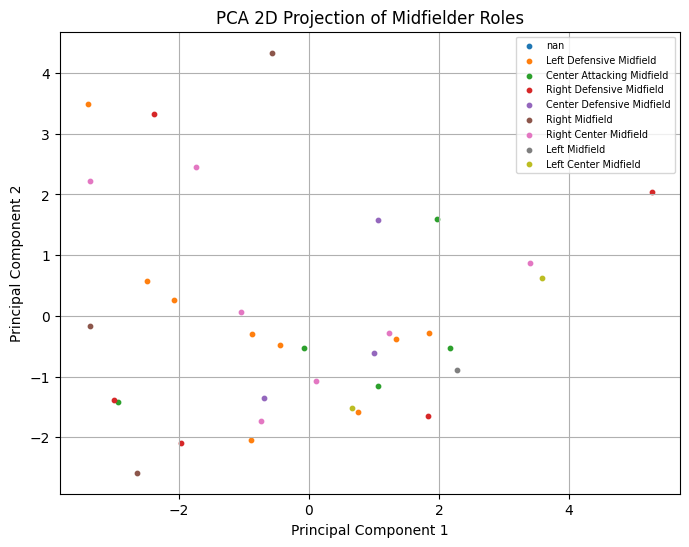

Explained Variance per Principal Component: [0.32806882 0.25099707]


In [211]:

midfield_X = X[X['position'].str.contains('Midfield')]
y = midfield_X['position']

scaled_X = StandardScaler().fit_transform(midfield_X.drop(columns=['player', 'position']))

pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(scaled_X)

pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([pca_df, y], axis=1)




plt.figure(figsize=(8, 6))
for label in final_df['position'].unique():
    filtered_df = final_df[final_df['position'] == label]
    plt.scatter(filtered_df['Principal Component 1'], filtered_df['Principal Component 2'], s=10, label=label)
plt.grid(True)
plt.title('PCA 2D Projection of Midfielder Roles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize='x-small')

plt.show()
print('Explained Variance per Principal Component:', pca.explained_variance_ratio_)


In [167]:
components = pca.components_
for i, component in enumerate(components, start=0):
    formula = f"PC{i} = "
    formula += " + ".join(f"{weight:.3f} * " + X.columns[j] for j, weight in enumerate(component, start=0))
    print(formula)

PC0 = -0.261 * duration + -0.111 * pass_angle + 0.161 * pass_length + -0.179 * shot_statsbomb_xg + -0.386 * type_Ball Receipt* + 0.387 * type_Block + -0.355 * type_Carry + -0.296 * type_Dribble + 0.337 * type_Duel + 0.187 * type_Pass + 0.400 * type_Pressure + -0.202 * type_Shot
PC1 = -0.197 * duration + 0.121 * pass_angle + -0.314 * pass_length + 0.229 * shot_statsbomb_xg + 0.201 * type_Ball Receipt* + 0.207 * type_Block + -0.282 * type_Carry + 0.310 * type_Dribble + 0.303 * type_Duel + -0.496 * type_Pass + 0.266 * type_Pressure + 0.359 * type_Shot


In [168]:
from sklearn.cluster import KMeans

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

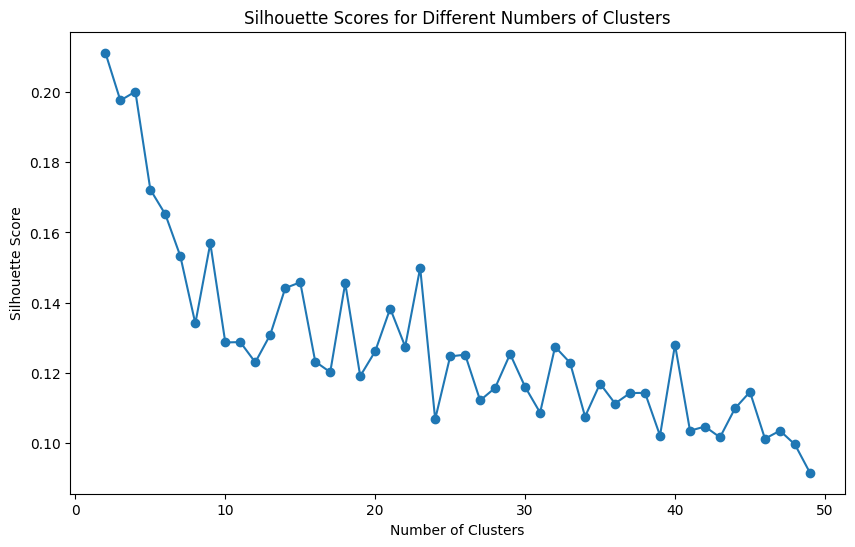

In [281]:
from sklearn.metrics import silhouette_score

# Assuming X_scaled is your scaled data
range_n_clusters = range(2, 50)  # Example range, you can modify this
# X_scaled = midfield_X.drop(columns=['player','position'])

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model
    cluster_labels = kmeans.fit_predict(scaled_X)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [175]:
# # Fit and transform the data using the scaler
# X_scaled = midfield_X.drop(columns=['player','position'])

# Create a KMeans clustering model (replace 'n_clusters' with your desired number of clusters)
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to the scaled data
kmeans.fit(scaled_X)

# Get cluster assignments for each data point
cluster_df = pd.DataFrame({'players': midfield_X['player'], 'positions': midfield_X['position'], 'labels': kmeans.labels_})
cluster_df

c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,players,positions,labels
2,Aaron Ramsey,Left Defensive Midfield,3
4,Adam David Lallana,Center Attacking Midfield,0
15,Alexander Banor Tettey,Right Defensive Midfield,1
16,Alexandre Dimitri Song-Billong,Center Defensive Midfield,1
19,Almen Abdi,Right Midfield,2
...,...,...,...
342,Vurnon Anita,Right Center Midfield,2
343,Wahbi Khazri,Left Midfield,0
347,Wes Hoolahan,Center Attacking Midfield,3
354,Yann Gérard M''Vila,Right Center Midfield,1


## Interpretation of Clusters

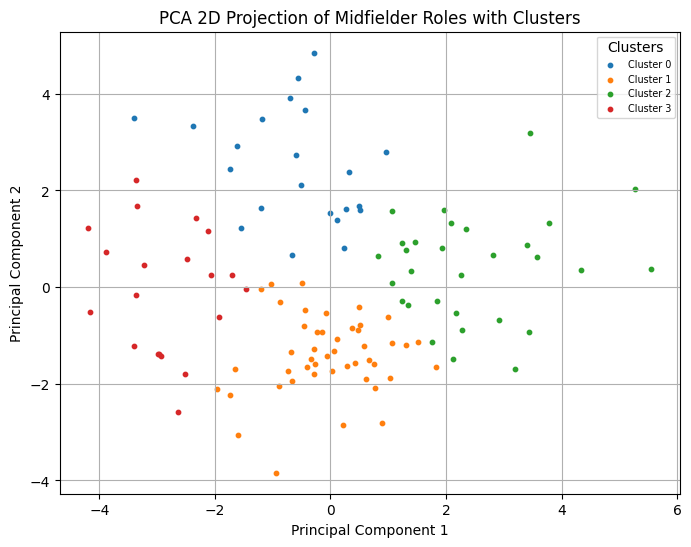

In [178]:
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# Plot clusters
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    filtered_df = pca_df[pca_df['Cluster'] == label]
    plt.scatter(filtered_df['Principal Component 1'], filtered_df['Principal Component 2'], s=10, label=f'Cluster {label}')

plt.grid(True)
plt.title('PCA 2D Projection of Midfielder Roles with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(fontsize='x-small', title='Clusters')

plt.show()

In [179]:
components = pca.components_
for i, component in enumerate(components, start=0):
    formula = f"PC{i} = "
    formula += " + ".join(f"{weight:.3f} * " + X.columns[j] for j, weight in enumerate(component, start=0))
    print(formula)

PC0 = -0.261 * duration + -0.111 * pass_angle + 0.161 * pass_length + -0.179 * shot_statsbomb_xg + -0.386 * type_Ball Receipt* + 0.387 * type_Block + -0.355 * type_Carry + -0.296 * type_Dribble + 0.337 * type_Duel + 0.187 * type_Pass + 0.400 * type_Pressure + -0.202 * type_Shot
PC1 = -0.197 * duration + 0.121 * pass_angle + -0.314 * pass_length + 0.229 * shot_statsbomb_xg + 0.201 * type_Ball Receipt* + 0.207 * type_Block + -0.282 * type_Carry + 0.310 * type_Dribble + 0.303 * type_Duel + -0.496 * type_Pass + 0.266 * type_Pressure + 0.359 * type_Shot


In [237]:
midfield_X['cluster'] = kmeans.labels_
mean_values_per_cluster = midfield_X.groupby('cluster').mean()
mean_values_per_cluster = mean_values_per_cluster[['duration', 'pass_angle', 'pass_length', 'type_Pass', 'type_Ball Receipt*',	'type_Carry', 'type_Dribble', 'type_Block', 'type_Duel', 'type_Pressure', 'type_Shot', 'shot_statsbomb_xg']]
mean_values_per_cluster

C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4133871959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midfield_X['cluster'] = kmeans.labels_
C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4133871959.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values_per_cluster = midfield_X.groupby('cluster').mean()


,duration,pass_angle,pass_length,type_Pass,type_Ball Receipt*,type_Carry,type_Dribble,type_Block,type_Duel,type_Pressure,type_Shot,shot_statsbomb_xg
cluster,,,,,,,,,,,,
0,1.294407,0.091819,18.077965,0.251347,0.313158,0.226068,0.018400,0.013105,0.031710,0.133427,0.012785,0.096343
1,1.352279,-0.032915,20.411890,0.320268,0.276126,0.250773,0.008049,0.010868,0.022002,0.106134,0.005780,0.064922
2,1.231528,-0.002915,19.843396,0.310993,0.247816,0.221370,0.008027,0.017232,0.035824,0.152308,0.006431,0.067969
3,1.432470,0.177309,17.953606,0.284352,0.312229,0.266147,0.019193,0.007921,0.016132,0.083894,0.010132,0.083307


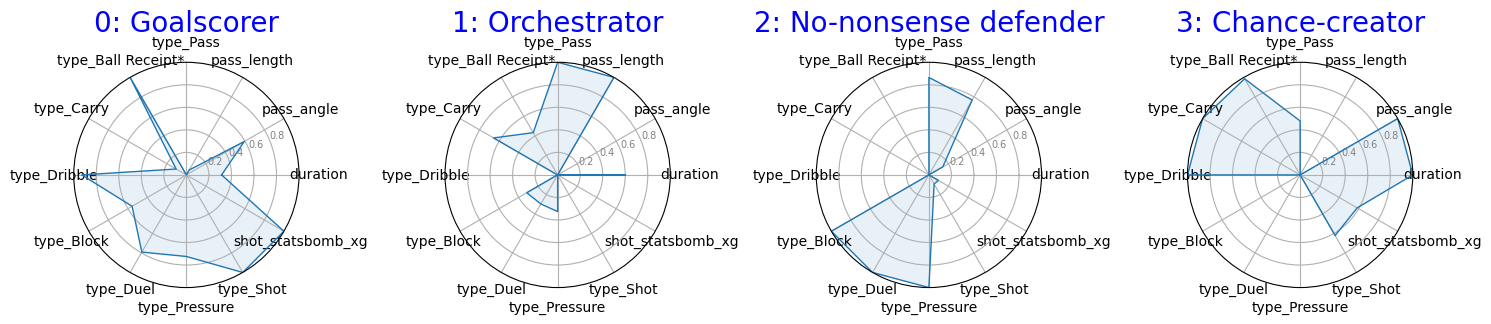

In [262]:
from math import pi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_mean_values_per_cluster = scaler.fit_transform(mean_values_per_cluster)
# Number of variables
categories = list(mean_values_per_cluster)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Number of clusters
num_clusters = len(mean_values_per_cluster)

# Create a subplot for each cluster
fig, axs = plt.subplots(1, num_clusters, subplot_kw=dict(polar=True), figsize=(15, 4))


cluster_labels = ['0: Goalscorer', '1: Orchestrator', '2: No-nonsense defender', '3: Chance-creator']

# Plot each cluster
for i, ax in enumerate(axs):
    values = scaled_mean_values_per_cluster[i].tolist()
    values += values[:1]  # Repeat the first value to close the circular graph
    
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=cluster_labels[i])
    ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    ax.set_ylim(0, 1)
    ax.set_title(cluster_labels[i], size=20, color='blue', y=1.1)

plt.tight_layout()
plt.show()

In [252]:
# cluster_df.loc[cluster_df['labels'] == 0]
# cluster_df.loc[cluster_df['labels'] == 1]
# cluster_df.loc[cluster_df['labels'] == 2]
cluster_df.loc[cluster_df['labels'] == 3]

,players,positions,labels
2,Aaron Ramsey,Left Defensive Midfield,3
45,Bojan Krkíc Pérez,Center Attacking Midfield,3
83,David Josué Jiménez Silva,Center Attacking Midfield,3
104,Fabian Delph,Left Defensive Midfield,3
121,Georginio Wijnaldum,Center Attacking Midfield,3
123,Gilbert Gianelli Imbula Wanga,Left Defensive Midfield,3
128,Gnégnéri Yaya Touré,Right Defensive Midfield,3
138,Ibrahim Afellay,Center Attacking Midfield,3
146,Jack Grealish,Center Attacking Midfield,3
195,José Manuel Jurado Marín,Left Midfield,3


In [241]:
midfield_X.loc[midfield_X['player'].str.contains('Nemanja')]

,duration,pass_angle,pass_length,shot_statsbomb_xg,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot,player,position,cluster
266,1.419713,-0.111433,18.89767,0.069365,0.271776,0.010271,0.25637,0.006518,0.025874,0.326486,0.095991,0.006715,Nemanja Matić,Left Defensive Midfield,1


In [294]:
# Define a function to calculate success percentage
def calculate_success_percentage(df, player_col, action_col, type_col, success_conditions, is_pass=False):
    # Special handling for pass success
    if is_pass:
        success_percentage = df.groupby(player_col).apply(
            lambda x: ((x[type_col] == success_conditions[0]) & x[action_col].isna()).sum() / x[type_col].eq(success_conditions[0]).sum() * 100
        )
    else:
        # General case for other actions
        success_percentage = df.groupby(player_col).apply(
            lambda x: ((x[action_col].isin(success_conditions)).sum() / x[action_col].notna().sum()) * 100
        )
    return success_percentage

# Calculate success percentages for each action
duel_success = calculate_success_percentage(one_hot_encoded, 'player', 'duel_outcome', 'type', ['Success In Play', 'Won'])
dribble_success = calculate_success_percentage(one_hot_encoded, 'player', 'dribble_outcome', 'type', ['Complete'])
pass_success = calculate_success_percentage(events, 'player', 'pass_outcome', 'type', ['Pass'], is_pass=True)
shot_success = calculate_success_percentage(one_hot_encoded, 'player', 'shot_outcome', 'type', ['Goal'])

# Merge these success rates into midfield_X
success_percent_df = midfield_X.merge(duel_success.rename('duel_success_percentage'), on='player', how='left')
success_percent_df = success_percent_df.merge(dribble_success.rename('dribble_success_percentage'), on='player', how='left')
success_percent_df = success_percent_df.merge(pass_success.rename('pass_success_percentage'), on='player', how='left')
success_percent_df = success_percent_df.merge(shot_success.rename('shot_success_percentage'), on='player', how='left')

success_percent_df

C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4027466551.py:11: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: ((x[action_col].isin(success_conditions)).sum() / x[action_col].notna().sum()) * 100
C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4027466551.py:11: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: ((x[action_col].isin(success_conditions)).sum() / x[action_col].notna().sum()) * 100
C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4027466551.py:6: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: ((x[type_col] == success_conditions[0]) & x[action_col].isna()).sum() / x[type_col].eq(success_conditions[0]).sum() * 100
C:\Users\andre\AppData\Local\Temp\ipykernel_21396\4027466551.py:11: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: ((x[action_col].isin(success_conditions)).sum() / x[action_col].notna().sum()) * 100


,duration,pass_angle,pass_length,shot_statsbomb_xg,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot,player,position,cluster,duel_success_percentage,dribble_success_percentage,pass_success_percentage,shot_success_percentage
0,1.380213,-0.117734,18.350989,0.110757,0.304348,0.007673,0.263562,0.009153,0.016826,0.295733,0.093687,0.009019,Aaron Ramsey,Left Defensive Midfield,3,60.227273,60.294118,84.433318,7.462687
1,1.242514,0.073644,15.209980,0.092518,0.317333,0.013005,0.224166,0.017262,0.027430,0.247340,0.143533,0.009931,Adam David Lallana,Center Attacking Midfield,0,63.934426,58.904110,78.107075,9.523810
2,1.297911,0.026741,19.064842,0.042604,0.248099,0.010456,0.243029,0.007605,0.024398,0.347592,0.112484,0.006337,Alexander Banor Tettey,Right Defensive Midfield,1,58.823529,79.166667,83.865087,10.000000
3,1.411000,-0.076092,19.269773,0.035894,0.240242,0.006057,0.263795,0.009421,0.030283,0.311575,0.134590,0.004038,Alexandre Dimitri Song-Billong,Center Defensive Midfield,1,60.526316,71.428571,83.369330,0.000000
4,1.149594,-0.073049,17.222351,0.060481,0.275092,0.019791,0.222788,0.005937,0.034493,0.288380,0.142494,0.011026,Almen Abdi,Right Midfield,2,61.176471,71.428571,79.803922,5.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1.298306,-0.177687,20.003388,0.035726,0.220764,0.019690,0.220764,0.007160,0.031623,0.338305,0.159308,0.002387,Vurnon Anita,Right Center Midfield,2,57.500000,54.166667,76.190476,12.500000
114,1.379157,0.403469,23.809320,0.031542,0.283363,0.011170,0.222222,0.020576,0.031158,0.247501,0.169312,0.014697,Wahbi Khazri,Left Midfield,0,52.941176,48.571429,64.370546,8.000000
115,1.383428,-0.079069,16.740530,0.135834,0.308947,0.009553,0.262582,0.013281,0.015377,0.274930,0.109273,0.006058,Wes Hoolahan,Center Attacking Midfield,3,43.750000,57.894737,79.491525,15.384615
116,1.414205,-0.053124,21.771189,0.033047,0.256391,0.013427,0.244620,0.006989,0.026301,0.330881,0.115873,0.005518,Yann Gérard M''Vila,Right Center Midfield,1,63.302752,73.684211,78.043357,3.333333


## Who is the best in the cluster at what they should be good at?
#### Nemanja Matic is in cluster 1. Cluster 1 players should be good at passing, dueling, and shooting in that order.

In [295]:
from scipy.spatial import distance

sorted_success_rates = success_percent_df.loc[success_percent_df['cluster']==1].sort_values(by=['pass_success_percentage', 'duel_success_percentage', 'dribble_success_percentage', 'shot_success_percentage'], ascending=False)

# Isolate the row for 'Matic'
matic_row = sorted_success_rates[sorted_success_rates['player'].str.contains('Nemanja')]

# Ensure there's only one row for 'Matic', or choose a method to handle multiple entries
if len(matic_row) == 1:
    # Select columns for distance calculation (all columns before 'player')
    cols_for_distance = sorted_success_rates.columns[:sorted_success_rates.columns.get_loc('player')]

    # Extract the row values for 'Matic' for the selected columns
    matic_values = matic_row[cols_for_distance].values[0]

    # Calculate Euclidean distance for each row from 'Matic'
    sorted_success_rates['distance_from_matic'] = sorted_success_rates.apply(lambda row: distance.euclidean(row[cols_for_distance], matic_values), axis=1)
else:
    print("Multiple or no entries for 'Matic'. Please handle accordingly.")

sorted_success_rates.sort_values(by=['pass_success_percentage', 'duel_success_percentage', 'dribble_success_percentage', 'shot_success_percentage'], ascending=False)

,duration,pass_angle,pass_length,shot_statsbomb_xg,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot,player,position,cluster,duel_success_percentage,dribble_success_percentage,pass_success_percentage,shot_success_percentage,distance_from_matic
88,1.282738,-0.101599,17.815383,0.075008,0.298362,0.006640,0.274015,0.003541,0.008411,0.329349,0.073927,0.005755,Mohamed Naser Elsayed Elneny,Right Defensive Midfield,1,66.666667,50.000000,92.069892,0.000000,1.091823
59,1.279565,-0.103404,18.338576,0.130626,0.274271,0.011936,0.253316,0.004775,0.024138,0.325199,0.104509,0.001857,John Michael Nchekwube Obinna,Right Defensive Midfield,1,58.181818,83.333333,90.946166,0.000000,0.579799
109,1.544182,0.208090,20.860869,0.094086,0.296000,0.006133,0.265067,0.005333,0.015467,0.317067,0.088533,0.006400,Sung-Yeung Ki,Left Center Midfield,1,45.161290,65.000000,90.328007,8.333333,1.993309
90,1.364078,-0.074419,17.275203,0.079857,0.253728,0.012428,0.271748,0.020920,0.030447,0.286454,0.119718,0.004557,Mousa Sidi Yaya Dembélé,Left Defensive Midfield,1,71.028037,80.198020,89.515546,13.636364,1.624790
33,1.167220,0.016028,18.185650,0.026200,0.260845,0.012065,0.265441,0.010342,0.026716,0.317150,0.104855,0.002585,Francis Joseph Coquelin,Left Defensive Midfield,1,71.794872,83.333333,89.492754,0.000000,0.767619
89,1.311057,-0.099410,19.397187,0.110026,0.273946,0.007689,0.248462,0.005712,0.023726,0.326011,0.112039,0.002417,Morgan Schneiderlin,Right Defensive Midfield,1,58.823529,73.076923,89.016173,9.090909,0.513300
71,1.239059,0.152381,17.761906,0.025433,0.272376,0.009981,0.262395,0.006761,0.018995,0.322601,0.105280,0.001610,Leon Britton,Center Defensive Midfield,1,57.142857,76.190476,88.223553,0.000000,1.180820
69,1.411163,0.119110,19.393542,0.045523,0.281441,0.008838,0.261047,0.006798,0.017675,0.316791,0.104011,0.003399,Kevin Linford Stewart,Center Defensive Midfield,1,80.952381,70.000000,87.553648,0.000000,0.547754
31,1.227596,-0.026357,18.409997,0.052828,0.272697,0.010015,0.252504,0.006567,0.026597,0.310951,0.115745,0.004925,Fernando Luiz Rosa,Left Defensive Midfield,1,62.500000,65.000000,87.222809,6.666667,0.531881
86,1.479066,-0.180262,21.774361,0.043636,0.296130,0.008551,0.264626,0.002700,0.014401,0.351485,0.060531,0.001575,Michael Carrick,Right Center Midfield,1,51.162791,58.333333,86.619718,0.000000,2.878713


In [292]:
sorted_success_rates = success_percent_df.loc[success_percent_df['cluster']==1].sort_values(by=['pass_success_percentage', 'duel_success_percentage', 'dribble_success_percentage', 'shot_success_percentage'], ascending=False)
sorted_success_rates

,duration,pass_angle,pass_length,shot_statsbomb_xg,type_Ball Receipt*,type_Block,type_Carry,type_Dribble,type_Duel,type_Pass,type_Pressure,type_Shot,player,position,cluster,duel_success_percentage,dribble_success_percentage,pass_success_percentage,shot_success_percentage
88,1.282738,-0.101599,17.815383,0.075008,0.298362,0.006640,0.274015,0.003541,0.008411,0.329349,0.073927,0.005755,Mohamed Naser Elsayed Elneny,Right Defensive Midfield,1,66.666667,50.000000,92.069892,0.000000
59,1.279565,-0.103404,18.338576,0.130626,0.274271,0.011936,0.253316,0.004775,0.024138,0.325199,0.104509,0.001857,John Michael Nchekwube Obinna,Right Defensive Midfield,1,58.181818,83.333333,90.946166,0.000000
109,1.544182,0.208090,20.860869,0.094086,0.296000,0.006133,0.265067,0.005333,0.015467,0.317067,0.088533,0.006400,Sung-Yeung Ki,Left Center Midfield,1,45.161290,65.000000,90.328007,8.333333
90,1.364078,-0.074419,17.275203,0.079857,0.253728,0.012428,0.271748,0.020920,0.030447,0.286454,0.119718,0.004557,Mousa Sidi Yaya Dembélé,Left Defensive Midfield,1,71.028037,80.198020,89.515546,13.636364
33,1.167220,0.016028,18.185650,0.026200,0.260845,0.012065,0.265441,0.010342,0.026716,0.317150,0.104855,0.002585,Francis Joseph Coquelin,Left Defensive Midfield,1,71.794872,83.333333,89.492754,0.000000
89,1.311057,-0.099410,19.397187,0.110026,0.273946,0.007689,0.248462,0.005712,0.023726,0.326011,0.112039,0.002417,Morgan Schneiderlin,Right Defensive Midfield,1,58.823529,73.076923,89.016173,9.090909
71,1.239059,0.152381,17.761906,0.025433,0.272376,0.009981,0.262395,0.006761,0.018995,0.322601,0.105280,0.001610,Leon Britton,Center Defensive Midfield,1,57.142857,76.190476,88.223553,0.000000
69,1.411163,0.119110,19.393542,0.045523,0.281441,0.008838,0.261047,0.006798,0.017675,0.316791,0.104011,0.003399,Kevin Linford Stewart,Center Defensive Midfield,1,80.952381,70.000000,87.553648,0.000000
31,1.227596,-0.026357,18.409997,0.052828,0.272697,0.010015,0.252504,0.006567,0.026597,0.310951,0.115745,0.004925,Fernando Luiz Rosa,Left Defensive Midfield,1,62.500000,65.000000,87.222809,6.666667
86,1.479066,-0.180262,21.774361,0.043636,0.296130,0.008551,0.264626,0.002700,0.014401,0.351485,0.060531,0.001575,Michael Carrick,Right Center Midfield,1,51.162791,58.333333,86.619718,0.000000
